# Housing Price Model - Mid Term Project

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

## Input Data

+ Converted xls file to a csv format and imported the data.
+ First exploration of the dataset: number of columns, rows, datatypes, nullvalues & main stats before starting the data cleaning process.

In [2]:
df = pd.read_csv("../data/data1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [3]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
df.describe().round(1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,291.7,1971.0,84.5,98078.0,47.6,-122.2,1986.6,12758.3,540296.6
std,2.876736e+09,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,442.7,29.4,401.8,53.5,0.1,0.1,685.2,27274.4,367368.1
min,1.000102e+06,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0,78000.0
25%,2.123049e+09,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0,322000.0
50%,3.904930e+09,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0,450000.0
75%,7.308900e+09,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0,645000.0
max,9.900000e+09,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0,7700000.0


In [5]:
# Check for na values in the dataframe

round(df.isna().sum()/len(df),4)*100

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

# Data Cleaning

In [6]:
# Change the datatype of zipecode from int to object. A numeric data type is not appropriate as you cannot perform arithmetic on them.

df['zipcode'] = df['zipcode'].astype(object)
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=object)

In [7]:
# Change date to datetime dtype

df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [8]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [9]:
# delete highly correlated columns with sqft_living
def delete_column(df):
    df = df.drop(columns=["sqft_above","sqft_living15"], inplace=True)
    return df
delete_column(df)

In [10]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1287,400000


# Data Exploration

In [11]:
# Checking for correlations with price

correlations = df.corr()["price"]
correlations

id              -0.016772
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
lat              0.306692
long             0.022036
sqft_lot15       0.082845
price            1.000000
Name: price, dtype: float64

In [12]:
numericals_features=df._get_numeric_data().drop(["id","lat","long"], axis=1)
numericals_features


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,1287,400000


In [13]:
# Include correlations over 0.5 with price in data

list_corr = list(correlations[correlations > 0.5].index)
list_corr

['bathrooms', 'sqft_living', 'grade', 'price']

# Exploration & Plotting 

+ Correlation heatmap of numerical features
+ Histogram of numerical features

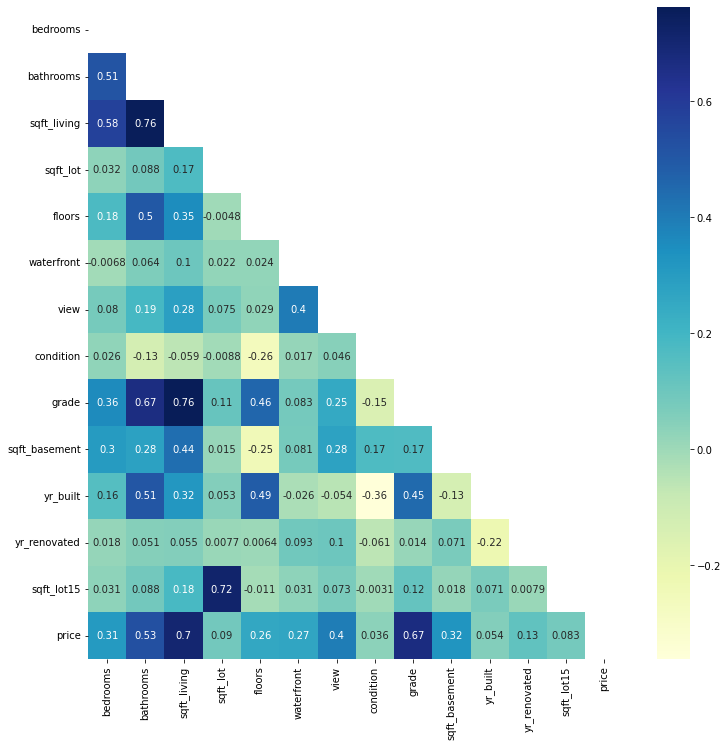

In [14]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(12, 12))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap="YlGnBu")
plt.show()

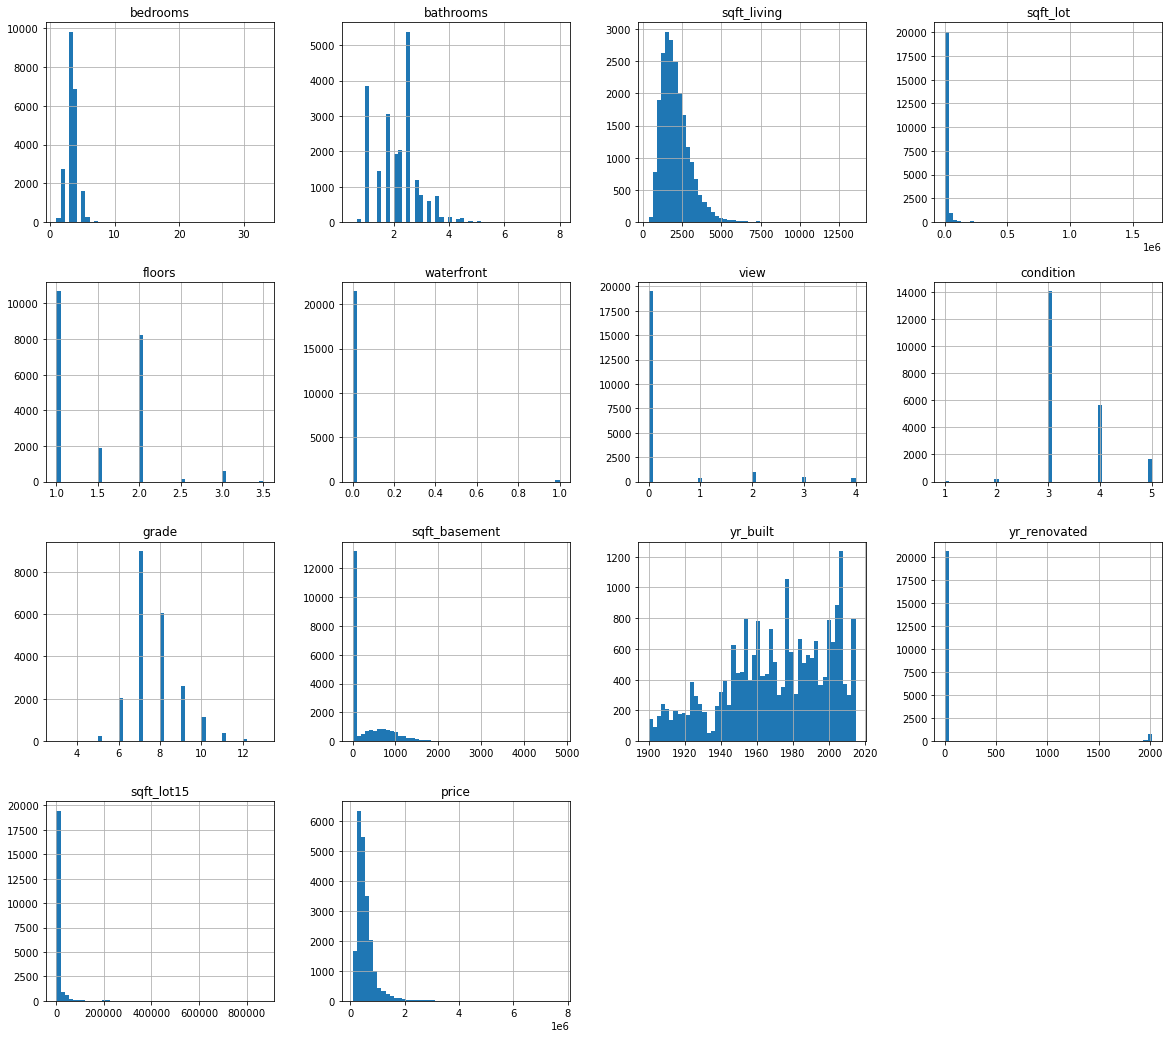

In [15]:

numericals_features.hist(bins=50, figsize=(20,18))
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

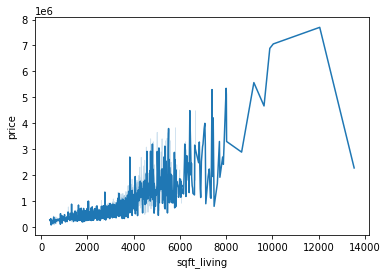

In [16]:
sns.lineplot(x="sqft_living", y="price", data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

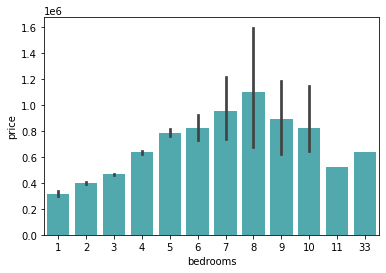

In [17]:
sns.barplot(x="bedrooms", y="price", data=df, color='#42b7bd')

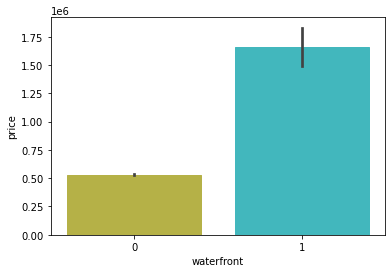

In [18]:
ax = sns.barplot(x="waterfront", y="price", data=df)
for bar in ax.patches:
    if bar.get_height() > 1000000:
        bar.set_color('#42b7bd')    
    else:
        bar.set_color('#b5b147')

<AxesSubplot:xlabel='yr_built', ylabel='price'>

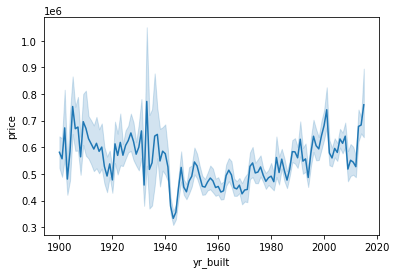

In [19]:
sns.lineplot(x="yr_built", y="price", data=df)

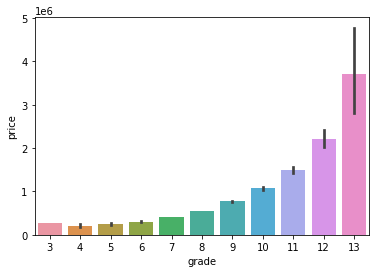

In [20]:
ax = sns.barplot(x="grade", y="price", data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

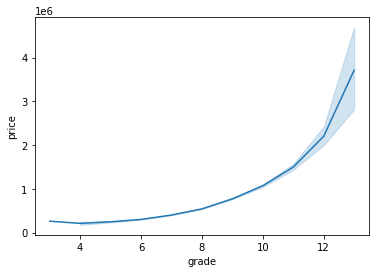

In [21]:
sns.lineplot(x="grade", y="price", data=df)

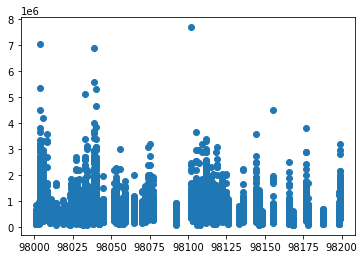

In [22]:
plt.scatter(x=df["zipcode"],y=df["price"])

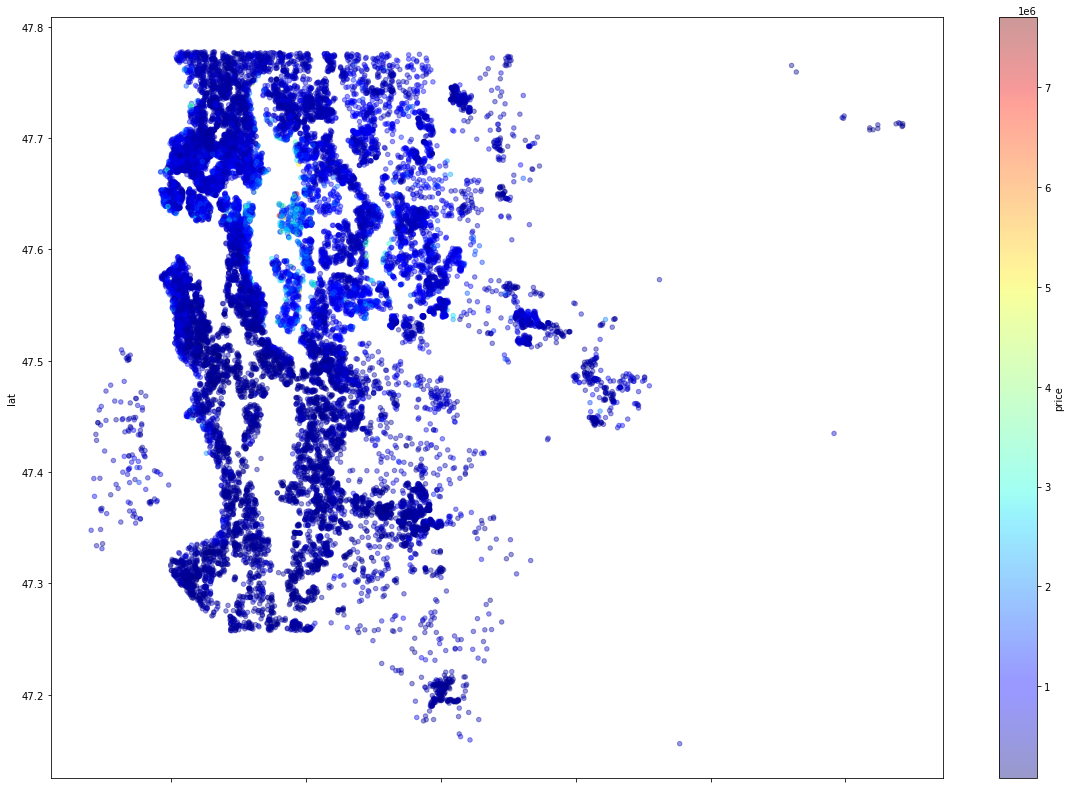

In [23]:
ax = df.plot(kind="scatter",x="long",y="lat",figsize=(20,14),c="price",cmap=plt.get_cmap("jet"),colorbar=True, alpha=0.4,)


# Remove outliers

+ Visualization of the highest correlated values with the target variable
+ Data binning 
+ Remove outliers from the dataset.

<AxesSubplot:xlabel='price'>

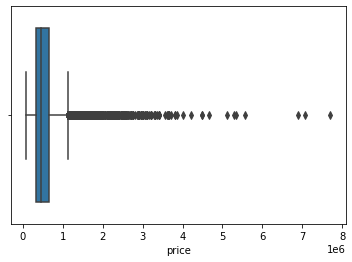

In [24]:
sns.boxplot(df.price)

In [25]:
# Check the data in bins

price_b=pd.cut(df["price"],10)
price_b

0        (70378.0, 840200.0]
1        (70378.0, 840200.0]
2        (70378.0, 840200.0]
3        (70378.0, 840200.0]
4        (70378.0, 840200.0]
                ...         
21592    (70378.0, 840200.0]
21593    (70378.0, 840200.0]
21594    (70378.0, 840200.0]
21595    (70378.0, 840200.0]
21596    (70378.0, 840200.0]
Name: price, Length: 21597, dtype: category
Categories (10, interval[float64, right]): [(70378.0, 840200.0] < (840200.0, 1602400.0] < (1602400.0, 2364600.0] < (2364600.0, 3126800.0] ... (4651200.0, 5413400.0] < (5413400.0, 6175600.0] < (6175600.0, 6937800.0] < (6937800.0, 7700000.0]]

In [26]:
count_binned=pd.value_counts(price_b)
count_binned

(70378.0, 840200.0]       19053
(840200.0, 1602400.0]      2118
(1602400.0, 2364600.0]      298
(2364600.0, 3126800.0]       90
(3126800.0, 3889000.0]       26
(3889000.0, 4651200.0]        4
(4651200.0, 5413400.0]        4
(6937800.0, 7700000.0]        2
(5413400.0, 6175600.0]        1
(6175600.0, 6937800.0]        1
Name: price, dtype: int64

In [27]:
df = df[df["price"] <= 1400000]
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1287,400000


<AxesSubplot:xlabel='sqft_living'>

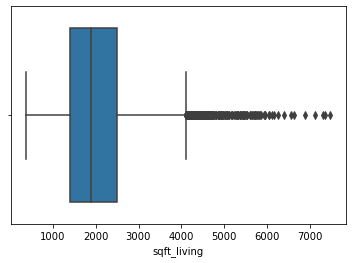

In [28]:
sns.boxplot(df.sqft_living)

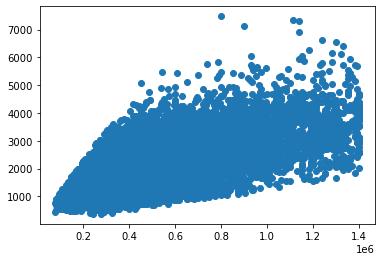

In [29]:
plt.scatter(x=df['price'], y=df['sqft_living'])
plt.show()

In [30]:
df = df[df["sqft_living"] <= 8000]
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1287,400000


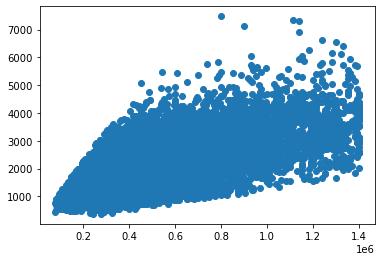

In [31]:
plt.scatter(x=df['price'], y=df['sqft_living'])
plt.show()

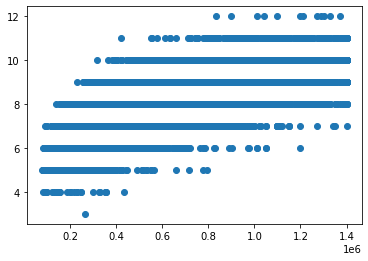

In [32]:
plt.scatter(x=df['price'], y=df['grade'])
plt.show()

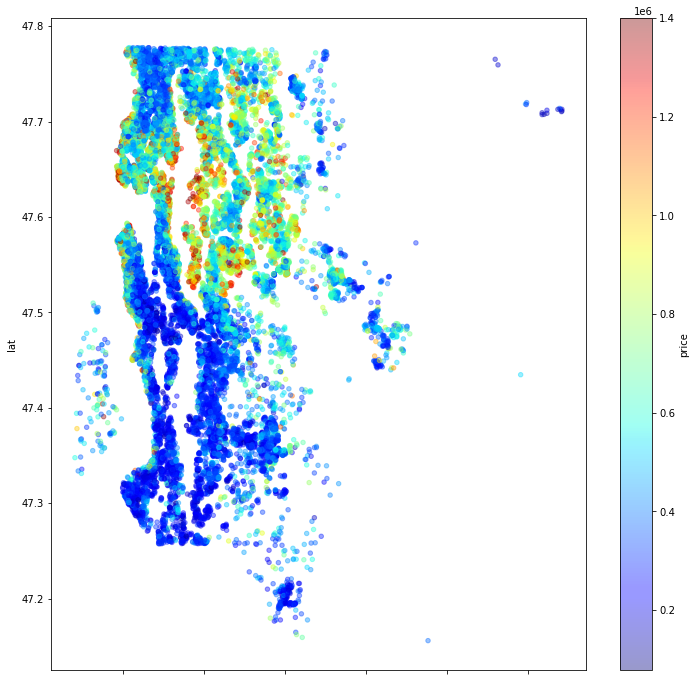

In [33]:
ax = df.plot(kind="scatter",x="long",y="lat",figsize=(12,12),c="price",cmap=plt.get_cmap("jet"),colorbar=True, alpha=0.4,)


# Data Processing

+ Include a new variable 'renovation_years', which is the difference between the sale date and the date of the last renovation.
+ Append the new variable and zipcode (transformed) to the list of correlatated variables.
+ Encode the dataset (dummies)

In [34]:
# Calculating years before last renovation, considering date as the sales point
def renovation_years_calc (df):
    if df['yr_renovated'] != 0:
        return int(df['date'].year) - df['yr_renovated']
    else:
        return int(df['date'].year) - df['yr_built']

df['renovation_years'] = df.apply(renovation_years_calc, axis=1)
df['renovation_years']

0        59
1        23
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: renovation_years, Length: 20982, dtype: int64

In [35]:
list_corr = list_corr + ['renovation_years','condition','zipcode']
list_corr

['bathrooms',
 'sqft_living',
 'grade',
 'price',
 'renovation_years',
 'condition',
 'zipcode']

In [36]:
new_df = df[list_corr]
new_df

,bathrooms,sqft_living,grade,price,renovation_years,condition,zipcode
0,1.00,1180,7,221900,59,3,98178
1,2.25,2570,7,538000,23,3,98125
2,1.00,770,6,180000,82,3,98028
3,3.00,1960,7,604000,49,5,98136
4,2.00,1680,8,510000,28,3,98074
...,...,...,...,...,...,...,...
21592,2.50,1530,8,360000,5,3,98103
21593,2.50,2310,8,400000,1,3,98146
21594,0.75,1020,7,402101,5,3,98144
21595,2.50,1600,8,400000,11,3,98027


In [37]:
# Encode the dataset using dummies
df = pd.get_dummies(new_df)
df

,bathrooms,sqft_living,grade,price,renovation_years,condition,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.00,1180,7,221900,59,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2.25,2570,7,538000,23,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,770,6,180000,82,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.00,1960,7,604000,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2.00,1680,8,510000,28,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.50,1530,8,360000,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,2.50,2310,8,400000,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,0.75,1020,7,402101,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,2.50,1600,8,400000,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
correlations2 = df.corr()['price']
correlations2.head(50)

bathrooms           0.481514
sqft_living         0.650779
grade               0.659002
price               1.000000
renovation_years   -0.103822
condition           0.036119
zipcode_98001      -0.118938
zipcode_98002      -0.107091
zipcode_98003      -0.098283
zipcode_98004       0.172653
zipcode_98005       0.101682
zipcode_98006       0.160843
zipcode_98007       0.041254
zipcode_98008       0.040610
zipcode_98010      -0.021120
zipcode_98011      -0.002633
zipcode_98014      -0.022344
zipcode_98019      -0.028717
zipcode_98022      -0.079559
zipcode_98023      -0.136697
zipcode_98024      -0.002476
zipcode_98027       0.053764
zipcode_98028      -0.018700
zipcode_98029       0.051844
zipcode_98030      -0.092960
zipcode_98031      -0.094049
zipcode_98032      -0.079236
zipcode_98033       0.119092
zipcode_98034      -0.010187
zipcode_98038      -0.091935
zipcode_98039       0.062779
zipcode_98040       0.190008
zipcode_98042      -0.126354
zipcode_98045      -0.029211
zipcode_98052 

# Data split

+ Split the X variable, droping the target variable ("price").
+ Isolate "price" in the Y variable.
+ Split the data into train and test

In [39]:
X=df.drop("price", axis=1)
y=df.price

In [40]:
X

,bathrooms,sqft_living,grade,renovation_years,condition,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.00,1180,7,59,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2.25,2570,7,23,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,770,6,82,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.00,1960,7,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2.00,1680,8,28,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.50,1530,8,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,2.50,2310,8,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,0.75,1020,7,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,2.50,1600,8,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

+ Use linear regression and Random Forest Regressor for modelling
+ Training the model using .fit
+ Get the predictions on the X_test using the .predict() function
+ Observe the result of the main metrics: 

    + R-squared: check the correlation level 
    + Mean absolute error (MAE): measures the absolute errors between paired observations
    + Mean standard error (MSE): measures the average squared difference between the estimated values and the actual value.


+ Check the main metrics using OLS (Ordinary Least Squares regression)

## Models without Scaling

In [42]:
# Scikit-learning 
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)

# Main metrics
print('R2:', r2_score(y_test, predictions))
print('MAE:', mae(y_test, predictions))
print('MSE:', mse(y_test, predictions, squared=False))


R2: 0.8133234681796786
MAE: 73447.85658375775
MSE: 102900.54034029761


## Random Forest Regression

In [43]:
# Using Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)

predicted_price = regressor.predict(X_test)


print('R2:', r2_score(y_test, predicted_price))
print('MAE:', mae(y_test, predicted_price)) 
print('MSE:', mse(y_test,predicted_price, squared=False)) 
print('Root MSE:', np.sqrt(mse(y_test, predicted_price)))

R2: 0.8089484921877195
MAE: 70789.56968416451
MSE: 104099.3525026349
Root MSE: 104099.3525026349


# Scaling

+ Normalize the range of independent variables.

In [44]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [45]:
X_test_scaled=std_scaler.transform(X_test)

In [46]:
X_train_scaled[0]

array([-1.48571055, -1.08826179, -0.54271873,  0.72970988,  0.91310921,
       -0.13166011, -0.09902667, -0.1165631 , -0.09841135, -0.08450021,
       -0.14930254, -0.08196004, -0.11708708, -0.06876656, -0.09654276,
       -0.0774171 , -0.09591212, -0.10556788, -0.15483898, -0.05785741,
       -0.14270509, -0.1149776 , -0.12518895, -0.10841618, -0.1149776 ,
       -0.07819212, -0.1387424 , -0.16578694, -0.17231201, -0.02674763,
       -0.10204978, -0.16729833, -0.10204978, -0.16879765, -0.14095658,
        8.90567262, -0.14007478, -0.14909389, -0.15199113, -0.12044041,
       -0.07464269, -0.11390898, -0.14614431, -0.1292987 , -0.09654276,
       -0.12906034, -0.06471364, -0.17139338, -0.10115196, -0.12469712,
       -0.11577292, -0.09399573, -0.06609174, -0.09810229, -0.16991441,
       -0.12567898, -0.16540716, -0.15362434, -0.09071503, -0.11630027,
       -0.13896528, -0.13001132, -0.15624523, -0.11091997, -0.12370794,
       -0.11390898, -0.04763468, -0.14486339, -0.10671591, -0.11

In [47]:
X_train.columns

Index(['bathrooms', 'sqft_living', 'grade', 'renovation_years', 'condition',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112',

# Models with scaled data

In [48]:
# OLS Regression

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     904.9
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:28:31   Log-Likelihood:            -2.1826e+05
No. Observations:               16785   AIC:                         4.367e+05
Df Residuals:                   16710   BIC:                         4.373e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.982e+05    831.060    599.473      0.0

## Linear Regression using scaled data

In [49]:
# Sckit-learning
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

y
y_pred=model.predict(X_test_scaled)   # model prediction


y_pred_train=model.predict(X_train_scaled)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mae(y_test, y_pred))
print('MSE:', mse(y_test,y_pred, squared=False))

R2: 0.8133234639313642
MAE: 73447.85774847868
MSE: 102900.54151118352


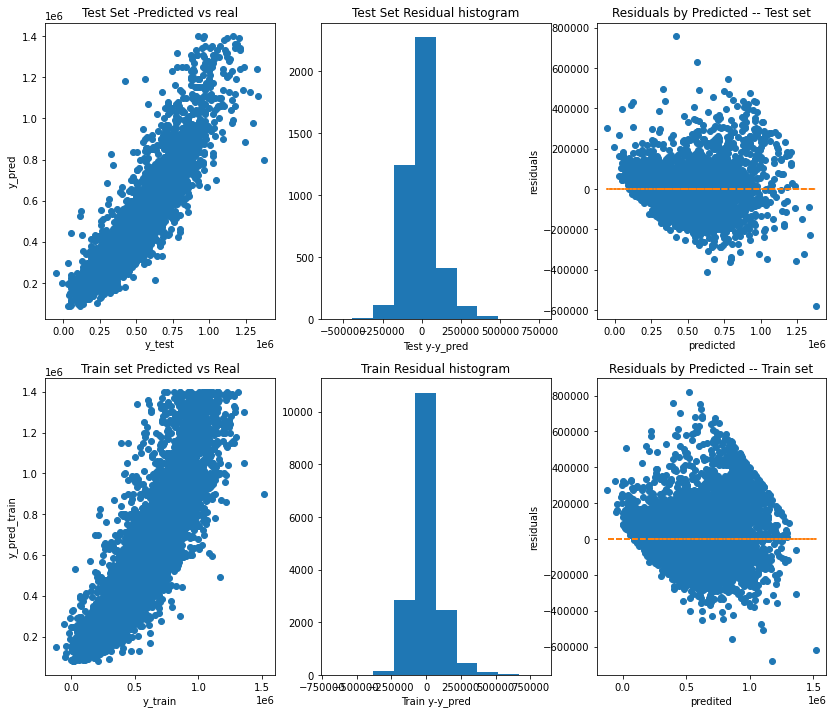

In [50]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(14,12))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o")
ax[0,2].set_xlabel("predicted")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted -- Test set")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs Real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predited")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

In [51]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

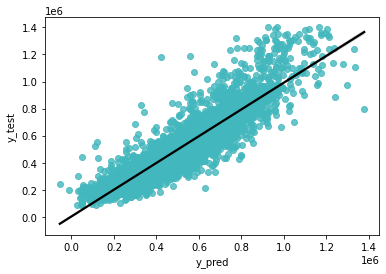

In [52]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "#42B7BD"}, line_kws={"color": "black"})

## Feature Importance

In [53]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by=["Importance"], ascending=False)

In [54]:
round(features_importances.head(20),1)

,Attribute,Importance
1,sqft_living,104624.8
2,grade,68556.2
8,zipcode_98004,37259.8
18,zipcode_98023,30960.7
30,zipcode_98040,28859.9
53,zipcode_98112,28024.1
31,zipcode_98042,27136.6
45,zipcode_98092,24005.8
26,zipcode_98033,23215.3
5,zipcode_98001,23206.3


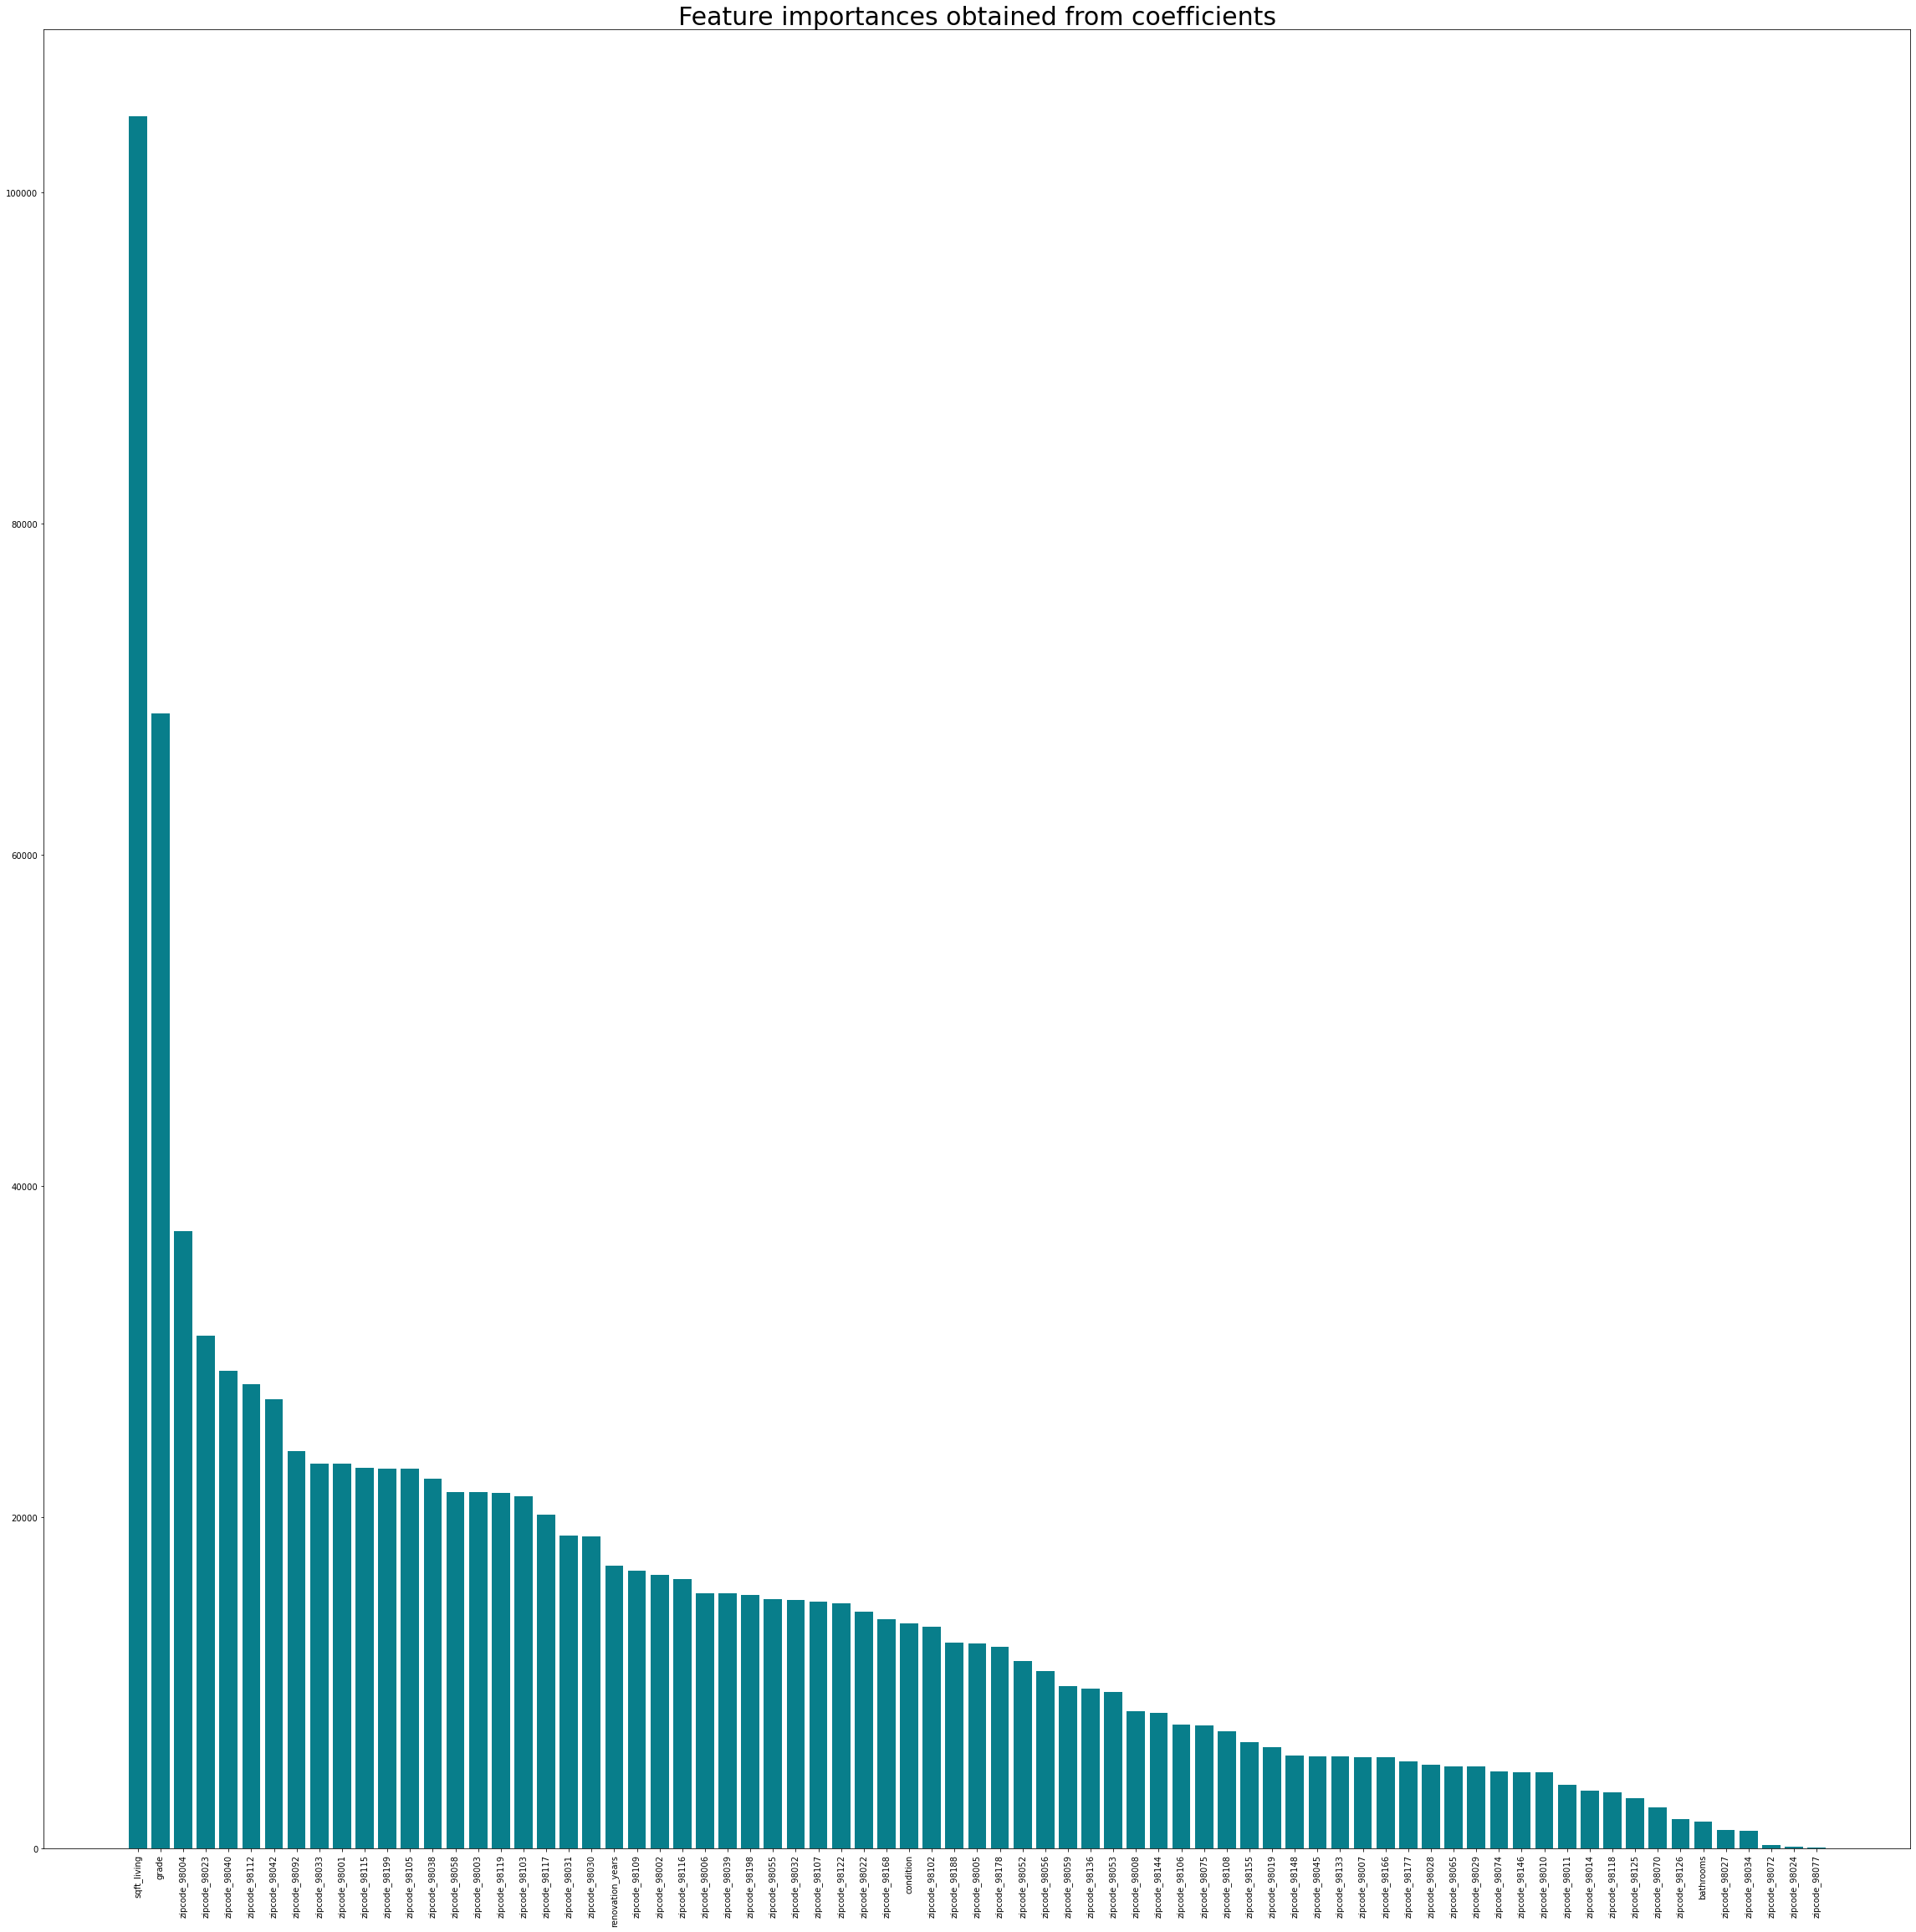

In [55]:
plt.figure(figsize=(40,40))
plt.bar(x=features_importances['Attribute'], height=features_importances["Importance"], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()